In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.interpolate import RegularGridInterpolator

In [4]:
L = 5
N = 128

x = np.linspace(-L/2,L/2,N)
X, Y, Z = np.meshgrid(x,x,x,indexing='ij')

In [5]:
q = 1
m = 1

In [16]:
"""
Define B field in polar coordinates.
"""

R = (X**2 + Y**2)**.5
# Phi = 

Bx, By, Bz = np.zeros((3,N,N,N))
Bz[:] = np.exp(-Z**2)
# Bz[:] += abs(Bz.min())
# Bx = -1 * np.exp(-np.abs(R)/1) * Y/np.abs(R)
# By = 1 * np.exp(-np.abs(R)/1) * X/np.abs(R)

# Bx = -1 * Y/np.abs(R)
# By = 1 * X/np.abs(R)

f = [0,0,0]

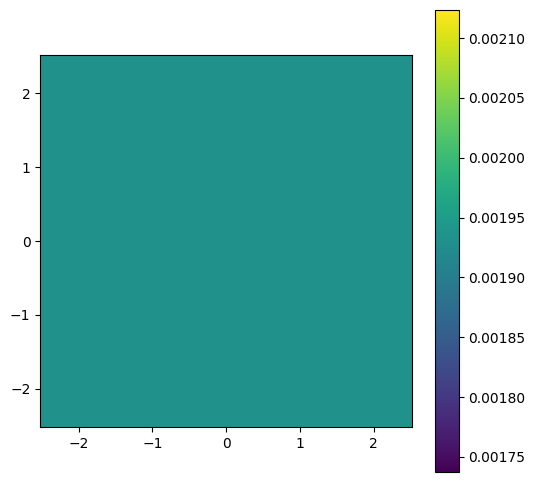

In [18]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect('equal')

im = ax.pcolormesh(X[:,:,0],Y[:,:,0],Bz[:,:,0])
# im = ax.pcolormesh(X[:,:,0],Y[:,:,0],R[:,:,100])
# im = ax.pcolormesh(Z[:,:,70])

# ax.quiver(X[::4,::4,0],Y[::4,::4,0],Bx[::4,::4,127],By[::4,::4,127],)


plt.colorbar(im)

plt.show()

In [8]:
Bx_func = RegularGridInterpolator((x,x,x),Bx)
By_func = RegularGridInterpolator((x,x,x),By)
Bz_func = RegularGridInterpolator((x,x,x),Bz)

def B_field(x):
    """
    Return field at a specific point.
    """
    _Bx, = Bx_func(x)
    _By, = By_func(x)
    _Bz, = Bz_func(x)
    return float(_Bx), float(_By), float(_Bz)

In [9]:
def get_pos_vel(t,y):

    pos = y[:3]
    vel = y[3:]

    B = B_field(pos)

    X = vel
    Y = [vel[1]*B[2]-vel[2]*B[1] + f[0],
         vel[2]*B[0]-vel[0]*B[2] + f[1],
         vel[0]*B[1]-vel[1]*B[0] + f[2]]

    out = np.concatenate([X,Y])

    return out

In [10]:
dt = .01
t_eval = np.arange(0,10,dt)

out = integrate.solve_ivp(get_pos_vel,(t_eval[0],t_eval[-1]),
                          [0,0,0,0,.5,0],
                          # [-2,0,0,-.1,0,0],
                          t_eval=t_eval
                         )
t = out['t']
y = out['y'][:3,:]
v = out['y'][3:,:]

ValueError: One of the requested xi is out of bounds in dimension 0

In [11]:
plt.plot(t,y[0])
plt.plot(t,y[1])
plt.plot(t,y[2])
plt.ylim(-L/2,L/2)
plt.xlim(t[0],t[-1])

NameError: name 't' is not defined

In [1]:
def dynamic_alpha(y, n):

    alpha = np.concatenate([np.linspace(0,1,n),np.ones(n)])
    
    if len(y)>=2*n:
        out = np.zeros(len(y))
        out[-int(2*n):] = alpha
        out[out<.05] = 0.05
    else:
        out = alpha[-int(2*n):]

    return out

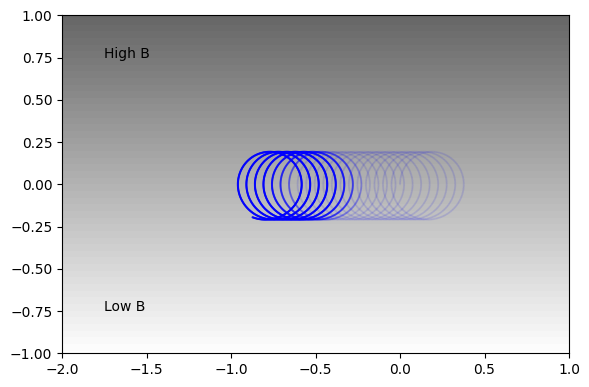

In [56]:
alpha_list = dynamic_alpha(y[0],1000)

fig, ax = plt.subplots(1,1,figsize=(6,6),tight_layout=True)

ax.set_aspect('equal')
ax.set_xlim(-L/2,L/2)
ax.set_ylim(-L/2,L/2)
# ax.grid()
ax.set_xlim(-2,1)
ax.set_ylim(-1,1)

mesh = ax.pcolormesh(X[:,:,0],Y[:,:,0],Bz[:,:,0],cmap='binary',alpha=.6,vmin=1.5,vmax=3.5)

# ax.quiver(X[::4,::4,0],Y[::4,::4,0],Bx[::4,::4,64],By[::4,::4,64],alpha=.2,scale=10)
ax.scatter(y[0],y[1],marker='.',c='b',s=1,
          alpha=alpha_list,
          )
# ax.scatter(x[2],x[1],alpha=alpha_list,marker='.',c='b',s=1)

# for alpha in alpha_list:
#     print(alpha)
#     line.set_alpha(alpha)
# plt.axis('off')

# cbar = fig.colorbar(mesh,shrink=.5)
# cbar.set_ticks([0,5])
# cbar.set_ticklabels(['Low B','High B'])

ax.text(-1.75,.75,"High B")
ax.text(-1.75,-.75,"Low B")

plt.savefig('drift 3.png',dpi=400,bbox_inches='tight')
plt.show()

In [32]:
X[:,:,0]

(128, 128)

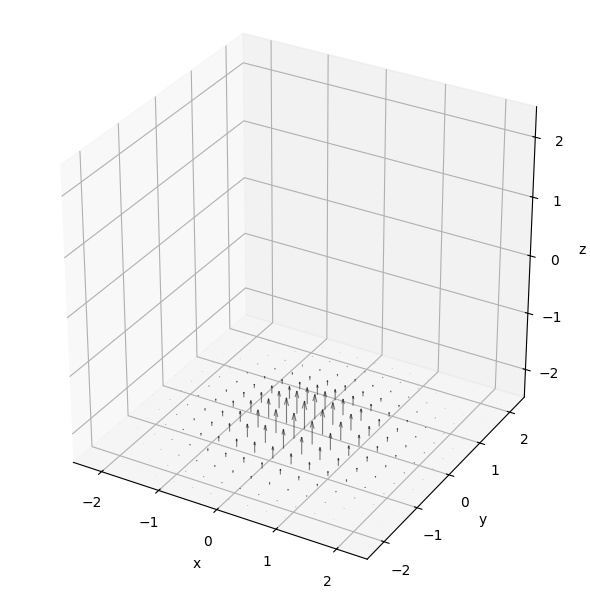

In [12]:
fig = plt.figure(figsize=(6,6),tight_layout=True)
ax = fig.add_subplot(111,projection='3d')

ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-L/2,L/2)
ax.set_ylim(-L/2,L/2)
ax.set_zlim(-L/2,L/2)

# ax.view_init(20,135,0)

ax.quiver(X[::8,::8,0],Y[::8,::8,0],Z[::8,::8,0],Bx[::8,::8,64],By[::8,::8,64],Bz[::8,::8,64],alpha=.5,lw=.8,color='k',length=.5)
# ax.scatter(y[0],y[1],y[2], c='b', marker='.',s=1)
# for i, alpha in enumerate(alpha_list):
#     ax.scatter(y[0][i],y[1][i],y[2][i], c='b', marker='.',s=1,alpha=alpha)
# plt.savefig('drift.png',dpi=400,bbox_inches='tight')
plt.show()

In [148]:
plt.show()

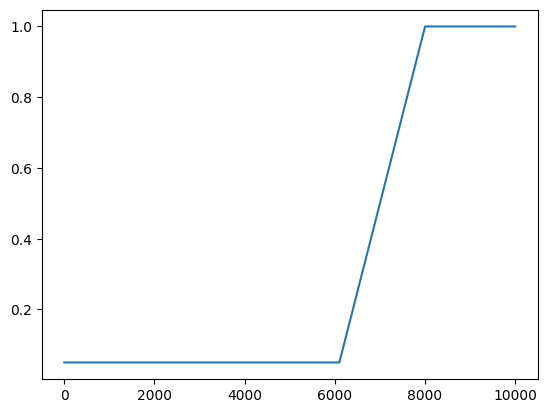

In [142]:
plt.plot(alpha_list)